1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from itertools import combinations
from scipy.stats import ttest_ind
from math import ceil

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [3]:
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


# функции


In [4]:
def dif(column):
    # сравнение среднего значения score для каждого элемента столбца
    cols = stud.loc[:, column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [5]:
def get_boxplot(columns):
    # возвращает боксплот для колонки
    fig, ax = plt.subplots(7, 4, figsize = (15, 30))
    plt.subplots_adjust(top=1)
    for i, column in enumerate(columns): 
        sns.boxplot(stud[column],
                   stud.score,
                   ax=ax[i//4][i%4])
        ax[i//4][i%4].set_title('Boxplot for ' + column)
    plt.xticks(rotation=45)
    plt.show()

In [6]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [7]:
stud.isnull().sum() # просмотр пропусков

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

# score

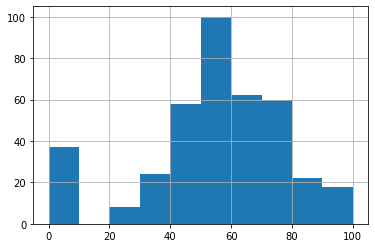

In [8]:
stud.score.hist()
plt.show()

Без нулей распределение выглядит более менее нормальным, но есть какая-то непонятная кучка нулей. Надо рассмотреть ее поближе

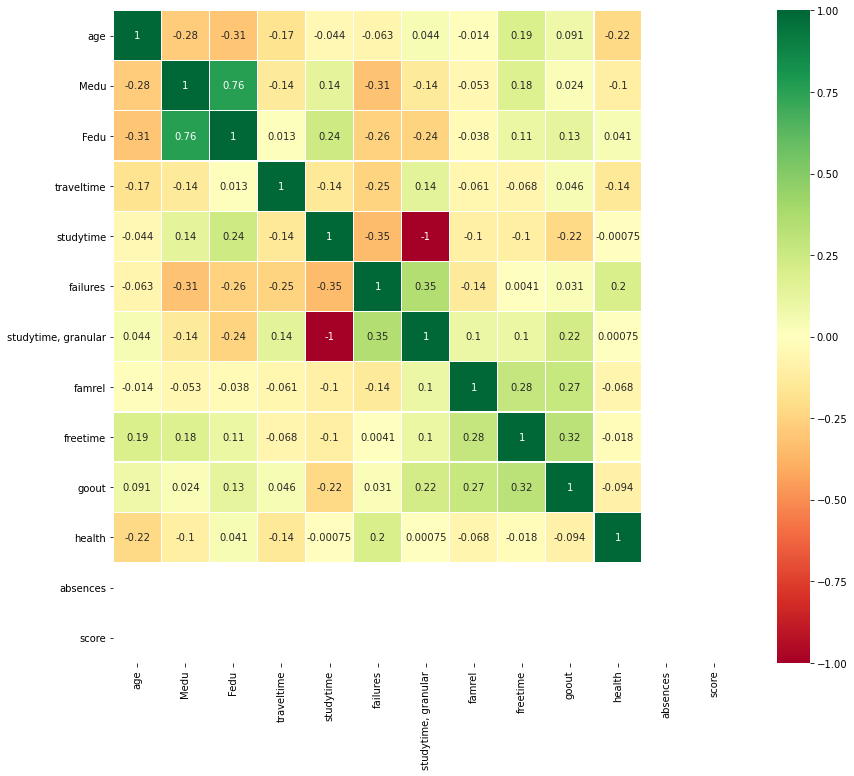

In [9]:
sns.heatmap(stud[stud.score == 0].corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

Везде где score = 0, пропуски так же равны 0. Я думаю что эти ученики не писали экзамен и были переведены  / отчисленны во время учебы

In [10]:
stud = stud[stud.score != 0] # исключение 0

stud.dropna(subset=['score'], inplace=True) # исключение пропусков

# school

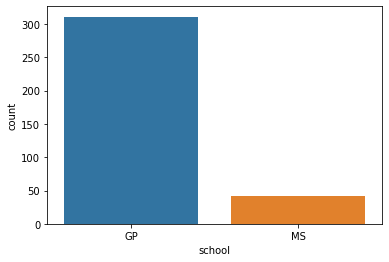

In [11]:
sns.countplot(stud.school)
plt.show()

In [12]:
stud.groupby('school')['score'].mean() # средняя оценка по экзамену взависимости от школы

school
GP    58.215434
MS    54.268293
Name: score, dtype: float64

На первый взгляд, разница кажется несущественной

# age

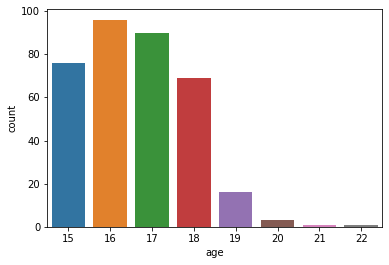

In [13]:
sns.countplot(stud.age)
plt.show()

C:\Users\Vyacheslav\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


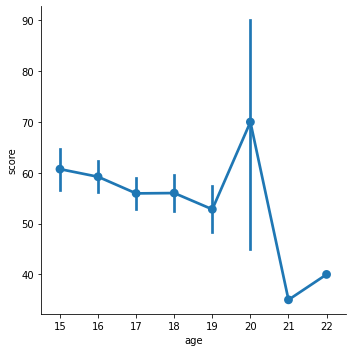

,score
age,
15,60.723684
16,59.218750
17,55.944444
18,56.014493
19,52.812500
20,70.000000
21,35.000000
22,40.000000


In [14]:
sns.factorplot(x ='age', y ='score', data = stud) # средние оценки в зависимости от возраста
plt.show()
stud.groupby('age')['score'].mean().to_frame()

На первый взгляд, возраст кажется важным фактором, но надо что делать с возрастом 20 + , возможно объединить

# sex

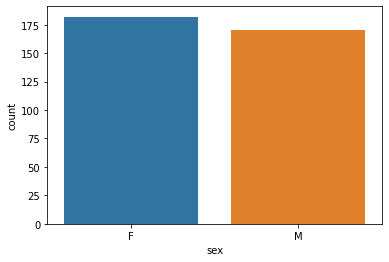

In [15]:
sns.countplot(stud.sex)
plt.show()

In [16]:
stud.groupby('sex')['score'].mean() # среднее значение score и среднее отклонение

sex
F    56.153846
M    59.470588
Name: score, dtype: float64

На первый взгляд, разница в баллах не кажется существенной

# address

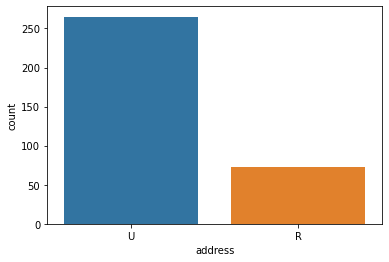

address
R    53.356164
U    58.830189
Name: score, dtype: float64

In [17]:
sns.countplot(stud.address)
plt.show()
stud.groupby('address')['score'].mean()

Разница в баллах кажется существенной

In [18]:
clean = (lambda x :
         None if pd.isnull(x) # функция для преобразования пропусков к None
         else None if str.lower(x) == 'nan'
         else None if x.strip == ''
         else x.strip())

In [19]:
stud.address = stud.address.apply(clean).apply(lambda x: 'U' if x == None else x) # заполнение пропусков самым частым значением

# famsize

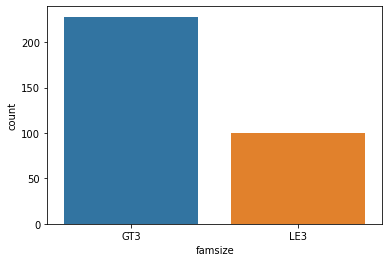

famsize
GT3    57.609649
LE3    58.500000
Name: score, dtype: float64

In [20]:
sns.countplot(stud.famsize)
plt.show()
stud.groupby('famsize')['score'].mean()

Оценка не зависит от размеры семьи

In [21]:
stud.famsize = stud.famsize.apply(clean).apply(lambda x:
                                               'GT3' if x == None else x) # заполнение пропусков самым частым значением

# Pstatus

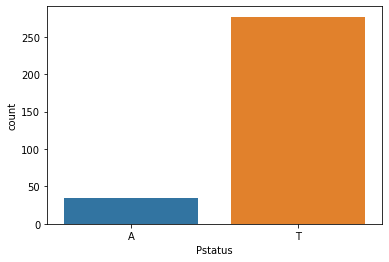

Pstatus
A    58.382353
T    57.490975
Name: score, dtype: float64

In [22]:
sns.countplot(stud.Pstatus)
plt.show()
stud.groupby('Pstatus')['score'].mean()

In [23]:
stud.Pstatus = stud.Pstatus.apply(clean).apply(lambda x:
                                               'T' if x == None else x) # заполнение пропусков самым частым значением

Разница в оценках не зависит от Pstatusa

# Medu

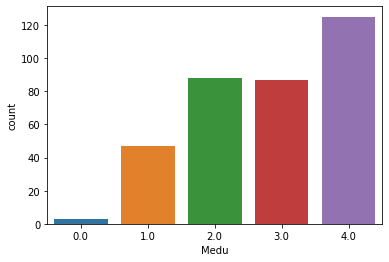

C:\Users\Vyacheslav\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


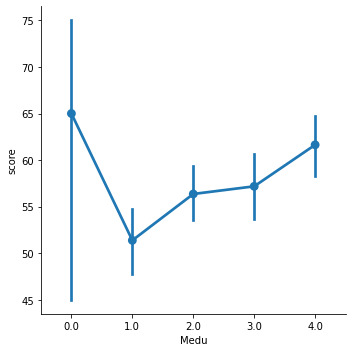

In [24]:
sns.countplot(stud.Medu)
plt.show()
sns.factorplot(x = 'Medu', y = 'score', data = stud)

Образование матери кажется важным фактором

In [25]:
stud = stud[~stud.Medu.isnull()] # исключение пропусков

# Fedu

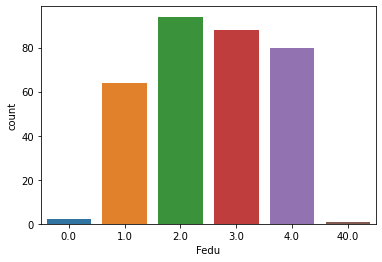

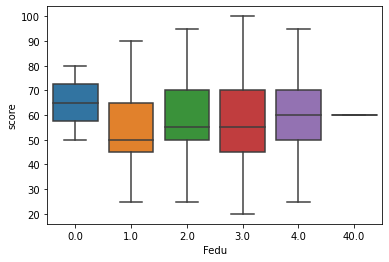

In [26]:
sns.countplot(stud.Fedu)
plt.show()
sns.boxplot(x = 'Fedu', y = 'score', data = stud)

In [27]:
stud.loc[stud.Fedu == 40, 'Fedu'] = 4 # исправление опечатки

C:\Users\Vyacheslav\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
stud = stud.dropna(subset=['Fedu'])  # исключение пропусков, т.к. нет ярко выраженного признака Fedu

Образование отца также кажется важным фактором

In [29]:
stud.groupby('Fedu')['score'].mean()

Fedu
0.0    65.000000
1.0    53.828125
2.0    57.819149
3.0    57.159091
4.0    61.234568
Name: score, dtype: float64

In [30]:
education = pd.DataFrame([stud.groupby('Medu')['score'].mean() , stud.groupby('Fedu')['score'].mean()]).T
education.columns = ['Medu', 'Fedu']
education

,Medu,Fedu
0.0,65.000000,65.000000
1.0,51.333333,53.828125
2.0,55.588235,57.819149
3.0,57.777778,57.159091
4.0,61.652174,61.234568


Кажется, что общий уровень образования родителей связан с успеха детей. Другими словами, чем образованее родители, тем лучше сдают экзамен дети

In [31]:
stud[stud.Fedu > 2]['Medu'].value_counts()

4.0    96
3.0    46
2.0    22
1.0     5
Name: Medu, dtype: int64

У более образованных мужчин, более образованные женщины, поэтому, я думаю, что признак образования можно будет объединить в один, при необходимости

# Mjob

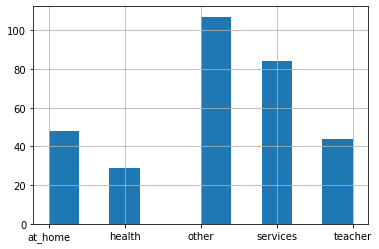

,mean,std
Mjob,,
at_home,53.229167,13.467438
health,64.310345,15.220061
other,54.579439,15.001910
services,59.761905,16.644851
teacher,60.681818,17.306771


In [32]:
stud.Mjob = stud.Mjob.apply(clean) # заполнение пропусков None
stud.Mjob.hist()
plt.show()
stud.groupby('Mjob')['score'].agg([np.mean, np.std])

In [33]:
stud.Mjob = stud.Mjob.apply(lambda x: 'other' if x == None else x) # заполнение пропусков значениями other

Работа матери кажется важным фактором

# Fjob

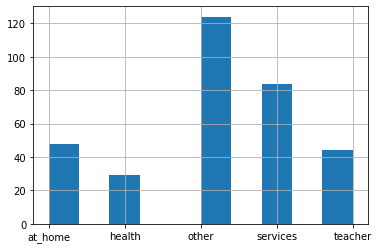

,mean,std
Fjob,,
at_home,57.500000,14.693845
health,52.692308,13.786374
other,57.100592,15.173459
services,56.158537,14.536009
teacher,66.956522,19.113247


In [34]:
stud.Mjob = stud.Mjob.apply(clean) # заполнение пропусков None
stud.Mjob.hist()
plt.show()
stud.groupby('Fjob')['score'].agg([np.mean, np.std])

In [35]:
stud.Fjob.fillna('other', inplace=True)  # заполнение пропусков значениями other

Работа отца кажется важным фактором

# reason

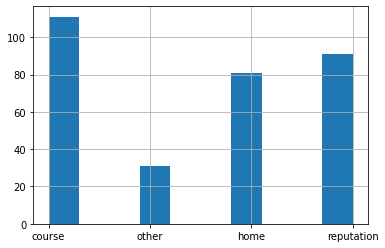

,mean,std
reason,,
course,56.486486,16.033978
home,59.135802,15.588259
other,55.806452,15.657627
reputation,58.791209,16.805103


In [36]:
stud.reason = stud.reason.apply(clean)  # заполнение пропусков None
stud.reason.hist()
plt.show()
stud.groupby('reason')['score'].agg([np.mean, np.std])

На удивление, выбор школы не кажется существенным фактором. Я думаю это из-за того, что школ не так и много

In [37]:
stud.reason = stud.reason.apply(lambda x: 'other' if x == None else x) # заполнение пропусков

# guardian

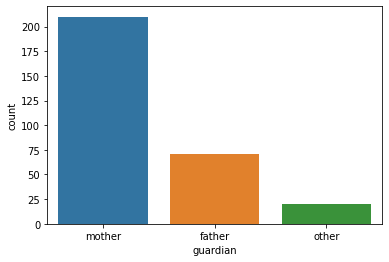

guardian
father    58.521127
mother    58.190476
other     54.750000
Name: score, dtype: float64

In [38]:
stud.guardian = stud.guardian.apply(clean)  # заполнение пропусков None
sns.countplot(stud.guardian)
plt.show()
stud.groupby('guardian')['score'].mean()

Наблюдаются некоторые различия для значения other, Но т.к. их немного и разница небольшая, я думаю что это незначительный фактор

In [39]:
stud.guardian = stud.guardian.apply(lambda x: 'mother' if x == None else x) # заполнение самым популярным значением

# traveltime

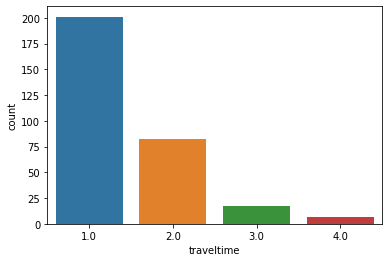

<ipython-input-40-5ea8eb4707dc>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stud.groupby('traveltime')['score', 'absences'].mean()


,score,absences
traveltime,,
1.0,58.532338,9.461140
2.0,56.463415,6.700000
3.0,57.352941,5.882353
4.0,50.000000,5.142857


In [40]:
sns.countplot(stud.traveltime)
plt.show()
stud.groupby('traveltime')['score', 'absences'].mean()

Заметен тренд на то, что чем дальше находится школа, тем хуже успеваемость. Но связь с пропусками занятый обратно противоположная

In [41]:
stud.traveltime.fillna(1, inplace=True) # заполнение пропусков самым популярным значением

# studytime

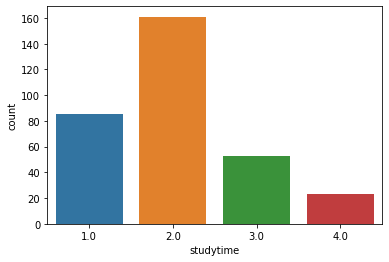

studytime
1.0    56.647059
2.0    55.496894
3.0    62.075472
4.0    64.782609
Name: score, dtype: float64

In [42]:
sns.countplot(stud.studytime)
plt.show()
stud.groupby('studytime')['score'].mean()

Достаточно ожидаемая связь между времененм за уроками и положительным эффектром от этого. Хотя это наблюдается только с 3.0, что до конца не ясно

In [43]:
stud.studytime.fillna(2, inplace=True) # заполнение пропусков самым популярным значением

# failures

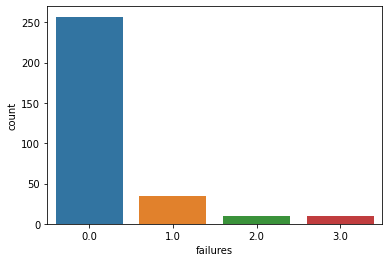

failures
0.0    59.591440
1.0    49.857143
2.0    45.000000
3.0    41.500000
Name: score, dtype: float64

In [44]:
sns.countplot(stud.failures)
plt.show()
stud.groupby('failures')['score'].mean()

Количество внеучебных неудач обратно пропорционально успеваемости

In [45]:
stud.failures.fillna(0, inplace=True) # заполнение пропусков

# schoolsup

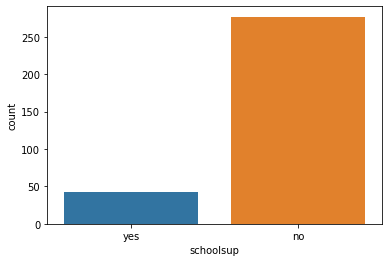

schoolsup
no     59.350181
yes    49.302326
Name: score, dtype: float64

In [46]:
stud.schoolsup = stud.schoolsup.apply(clean)
sns.countplot(stud.schoolsup)
plt.show()
stud.groupby('schoolsup')['score'].mean()

Дети с доп поддержкой сдают существенно хуже

In [47]:
stud.schoolsup.fillna('no', inplace=True) # заполнение пропусков

# famsup

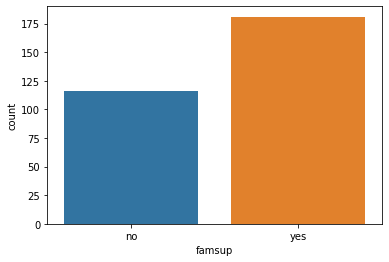

famsup
no     58.448276
yes    56.878453
Name: score, dtype: float64

In [48]:
stud.famsup = stud.famsup.apply(clean) # приведение пропусков к None
sns.countplot(stud.famsup)
plt.show()
stud.groupby('famsup')['score'].mean()

In [49]:
stud.groupby(['Fedu', 'famsup'])['score'].mean().to_frame()

score
Fedu famsup           
0.0  no      50.000000
     yes     80.000000
1.0  no      56.060606
     yes     51.521739
2.0  no      58.142857
     yes     56.666667
3.0  no      59.464286
     yes     55.277778
4.0  no      62.105263
     yes     60.454545

Разница несущественная, хотя у детей с поддержкой оценки хуже

In [50]:
stud.famsup.fillna('yes', inplace=True) # заполнение пропусков самым популярным значением

# paid

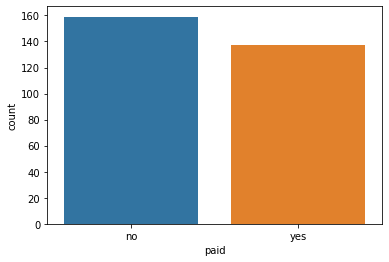

paid
no     58.396226
yes    57.919708
Name: score, dtype: float64

In [51]:
sns.countplot(stud.paid)
plt.show()
stud.groupby('paid')['score'].mean()

Различия в средних значениях несущественные

In [52]:
stud.paid.fillna('no', inplace=True) # заполнение пропусков

# activities

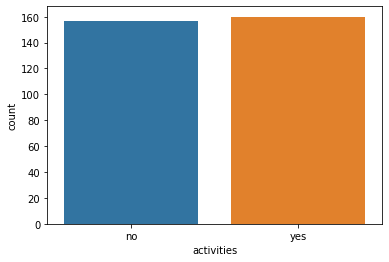

activities
no     56.687898
yes    58.968750
Name: score, dtype: float64

In [53]:
sns.countplot(stud.activities)
plt.show()
stud.groupby('activities')['score'].mean()

Фактор несущественный

In [54]:
stud.activities.fillna('yes', inplace=True) # зполнение пропусков

# nursery

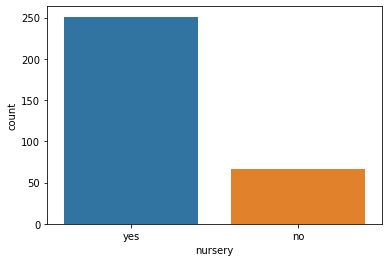

nursery
no     56.363636
yes    57.888446
Name: score, dtype: float64

In [55]:
sns.countplot(stud.nursery)
plt.show()
stud.groupby('nursery')['score'].mean()

Фактор не существенный

In [56]:
stud.nursery.fillna('yes', inplace=True)

# studytime, granular

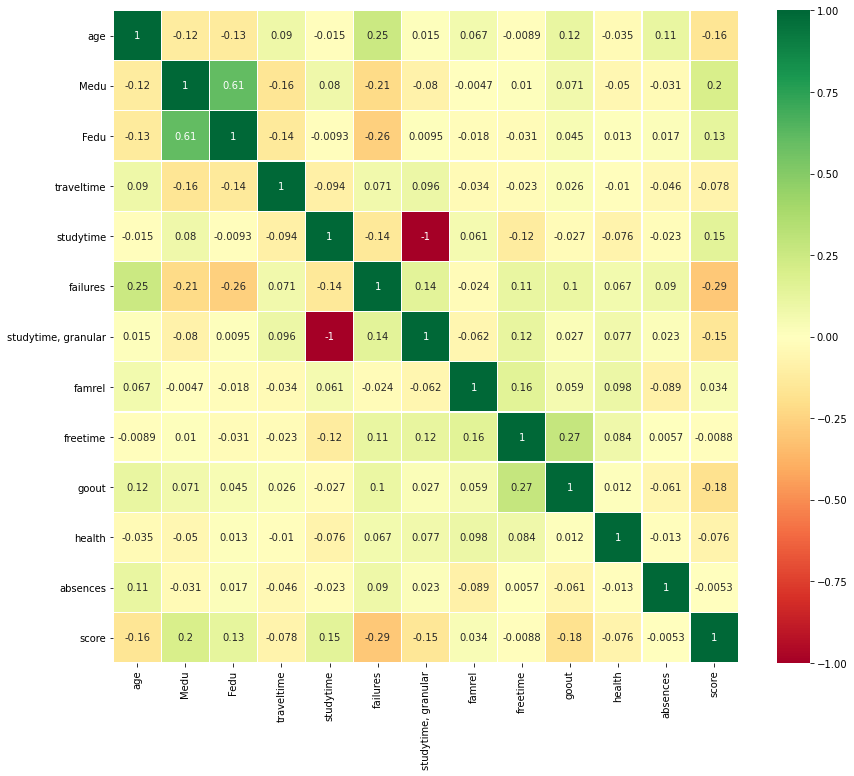

In [57]:
sns.heatmap(stud.corr(),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

In [58]:
stud.drop('studytime, granular', axis=1, inplace=True) # corr = 1

# higher

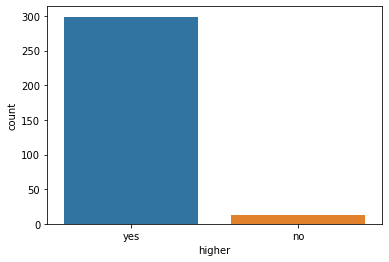

higher
no     49.230769
yes    58.060201
Name: score, dtype: float64

In [59]:
sns.countplot(stud.higher)
plt.show()
stud.groupby('higher')['score'].mean()

In [60]:
stud.higher.fillna('yes', inplace=True)

# internet

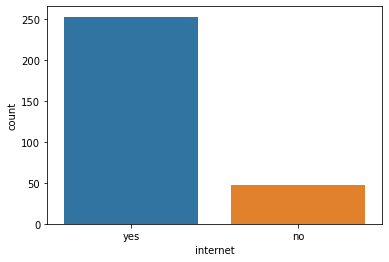

internet
no     55.212766
yes    58.142292
Name: score, dtype: float64

In [61]:
sns.countplot(stud.internet)
plt.show()
stud.groupby('internet')['score'].mean()

Интернет сказывается положительно, но я бы не сказал что существенно

In [62]:
stud.internet.fillna('yes', inplace=True) # заполнение пропусков

# romantic

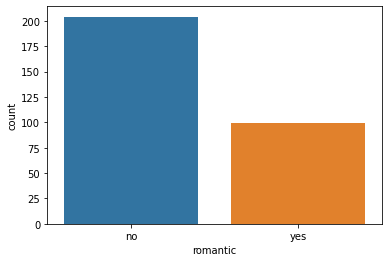

score
studytime romantic           
1.0       no        57.377049
          yes       52.352941
2.0       no        56.597938
          yes       54.732143
3.0       no        61.833333
          yes       62.727273
4.0       no        65.937500
          yes       62.500000

In [63]:
sns.countplot(stud.romantic)
plt.show()
stud.groupby(['studytime', 'romantic'])['score'].mean().to_frame()

Отношения слегка влияют на оценку, причем независимо от времени уделенное на обучение

In [64]:
stud.romantic.fillna('no', inplace=True) # заполнение пропусков

# famrel

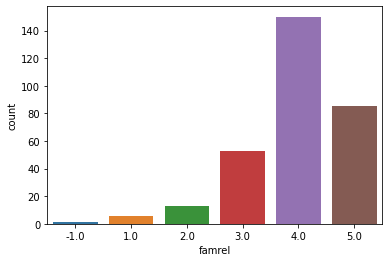

,score
famrel,
-1.0,40.000000
1.0,64.166667
2.0,59.230769
3.0,57.452830
4.0,56.400000
5.0,60.117647


In [65]:
sns.countplot(stud.famrel)
plt.show()
stud.groupby('famrel')['score'].mean().to_frame()

Прямой взаимосвязи с оценками не заметно

In [66]:
stud.loc[stud.famrel == -1, 'famrel'] = 1   # исправление опечатки

In [67]:
stud.famrel.fillna(4, inplace=True) # заполнение пропусков

# freetime

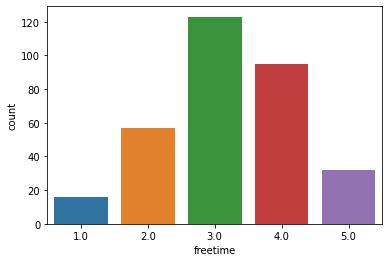

,score
freetime,
1.0,54.375000
2.0,61.315789
3.0,56.178862
4.0,56.684211
5.0,59.843750


In [68]:
sns.countplot(stud.freetime)
plt.show()
stud.groupby('freetime')['score'].mean().to_frame()

Фактор кажется существенным, особенно на уровне занятости 1, но прямой прямой взаимосвязи незаметно

In [69]:
stud.freetime.fillna(3, inplace=True) # замена пропусков самым популярным значением

# goout

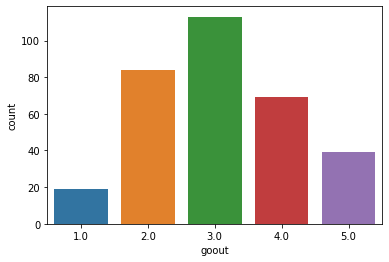

,score
goout,
1.0,59.736842
2.0,61.428571
3.0,58.716814
4.0,54.275362
5.0,52.435897


In [70]:
sns.countplot(stud.goout)
plt.show()
stud.groupby('goout')['score'].mean().to_frame()

Существенный фактор, и можно сказать что обратная взаимосвязь успеваемости с общением с другзьями

In [71]:
stud.goout.fillna(3, inplace=True) # замена пропусков самым популярным значением

# health      


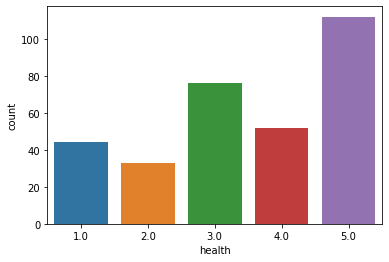

,score
health,
1.0,61.250000
2.0,61.818182
3.0,55.460526
4.0,57.788462
5.0,57.455357


In [72]:
sns.countplot(stud.health)
plt.show()
stud.groupby('health')['score'].mean().to_frame()

На первый взгляд, фактор кажется не существенным

In [73]:
stud.health.fillna(5, inplace=True) # замена пропусков самым популярным значением

# absences

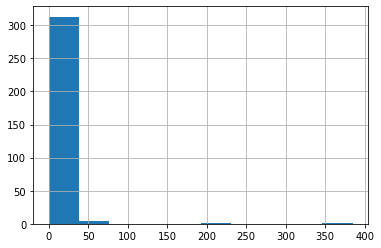

In [74]:
stud.absences.hist()

Не известно сколько всего было занятий, но я предположу, что значения больше 100 это выборосы


(-0.076, 7.5]    222
(7.5, 15.0]       64
(15.0, 22.5]      21
(22.5, 30.0]       5
(52.5, 60.0]       2
(37.5, 45.0]       2
(67.5, 75.0]       1
(60.0, 67.5]       0
(45.0, 52.5]       0
(30.0, 37.5]       0
Name: absences, dtype: int64

count    317.000000
mean       6.328076
std        8.422747
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

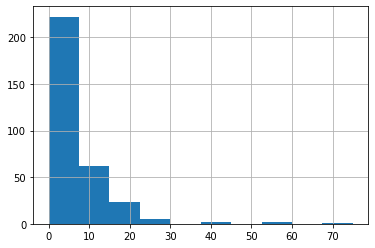

In [75]:
stud = stud[stud.absences < 100]
stud.absences= stud.absences.apply(lambda x: ceil(stud.absences.mean()) if pd.isnull(x) else x) # преобразование 0 к mean
stud.absences.hist(bins=10)
display(stud.absences.value_counts(bins=10))
stud.absences.describe()

In [76]:
stud['absences_cat'] = stud.loc[:, 'absences'].apply(lambda x: 0 if x<15 else 1) # переход к категориальному признаку

In [77]:
stud.groupby('absences_cat')['score'].mean().to_frame()

,score
absences_cat,
0,58.327465
1,49.848485


Пропуски сказываются на успеваемости

# списки

In [78]:
nomin = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
         'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'absences_cat']
categ = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'romantic', 'famrel', 'freetime',
         'goout', 'health']

# Построение boxplot

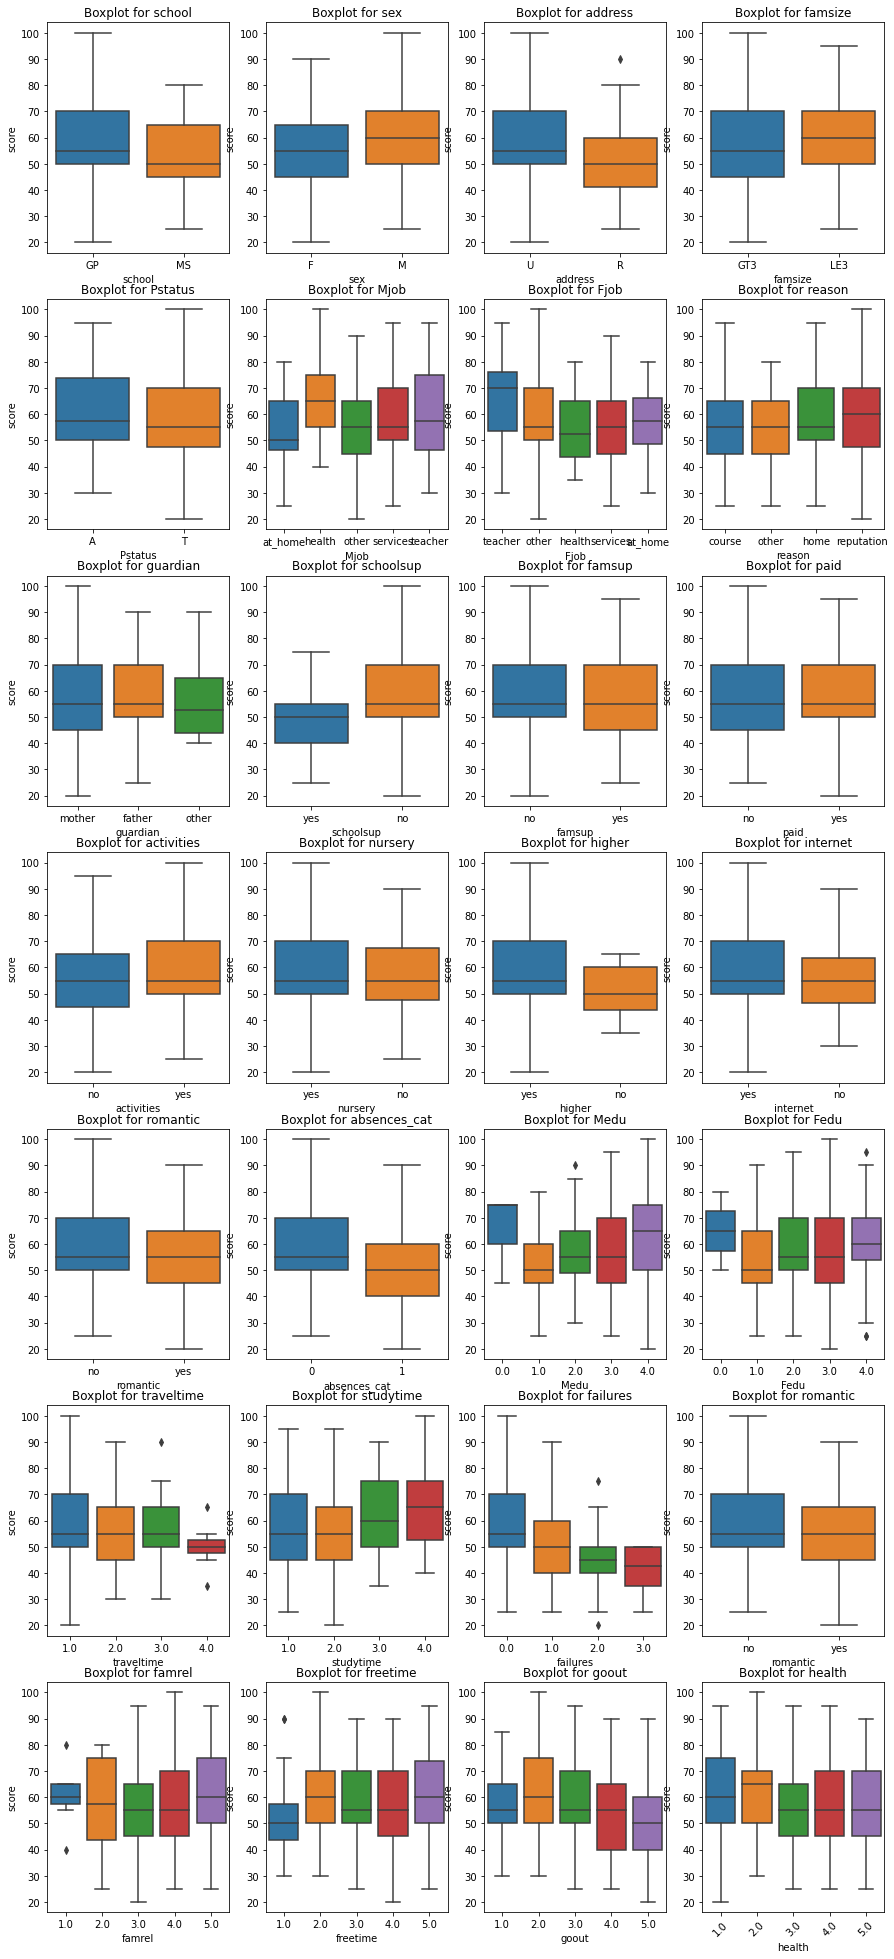

In [79]:
get_boxplot(nomin + categ)

# Поиск статистически значимых различий

In [80]:
for col in (nomin + categ):
    dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки absences_cat
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


Возможно так нельзя делать, но я не буду включать фактор пола, т.к. мне все еще кажется что он несущественный

# формирование конечного датасета

In [84]:
stud_final = ['sex', 'address', 'Mjob', 'schoolsup', 'absences', 'Medu',
              'studytime', 'failures', 'goout', 'age', 'score']
stud = stud.loc[:, stud_final]
stud

,sex,address,Mjob,schoolsup,absences,Medu,studytime,failures,goout,age,score
0,F,U,at_home,yes,6.0,4.0,2.0,0.0,4.0,18,30.0
1,F,U,at_home,no,4.0,1.0,2.0,0.0,3.0,17,30.0
2,F,U,at_home,yes,10.0,1.0,2.0,3.0,2.0,15,50.0
3,F,U,health,no,2.0,4.0,3.0,0.0,2.0,15,75.0
4,F,U,other,no,4.0,3.0,2.0,0.0,2.0,16,50.0
...,...,...,...,...,...,...,...,...,...,...,...
388,F,U,teacher,no,0.0,3.0,2.0,0.0,4.0,18,40.0
391,M,U,services,no,3.0,3.0,1.0,0.0,5.0,17,80.0
392,M,R,other,no,3.0,1.0,1.0,3.0,3.0,21,35.0
393,M,R,services,no,0.0,3.0,1.0,0.0,1.0,18,50.0


В данном датасет было достаточно много пропусков, при небольшом количестве строк. Выбрасы и опечатки были замечены и исправлены. С помощью метода corr() был найдет и удален лишний столбец. В столбце score была группа необоснованных нулей, я пришел к выводу что это выбросы и в дальнейшей они могут навредить. 
Самые важные паарметры, которые предполагаются использоваться в дальнейшем приведены в списке stud_final. Остались непонятны некоторые вещи, такие как почему не включен параметр traveltime, хотя для меня это кажется важным фактром. Так же неясно куда пропал параметр Fedu. Я бы не стал его включать, потому что мне кажется что он частично дублируется параметром Medu, но тем не менее. Все найденные факторы я проверил дополнительно с помощью one way anova. Я не смог сделать красивый цикл для этого, поэтому не стал позориться с выводом по одному.
Никаких удивительных выводов сделать не могу. Столбцом осталось достаточно много. Но, наверное, можно выделить то что в более образованной семье дети сдают экзамен лучше. И чем больше времени дети уделяют учебе, тем лучше это сказывается на оценке.